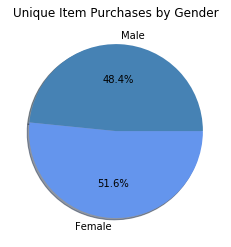

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

df.head(5)

#print(df.info())

count_m = df[df['Gender']=='M'].count()[0]
count_f = df[df['Gender']=='F'].count()[0]
#print('Number of male clients:',count_m)
#print('Number of female clients:',count_f)

plt.pie(df.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%',colors=['steelblue','cornflowerblue'])
plt.title('Unique Item Purchases by Gender')
plt.show()

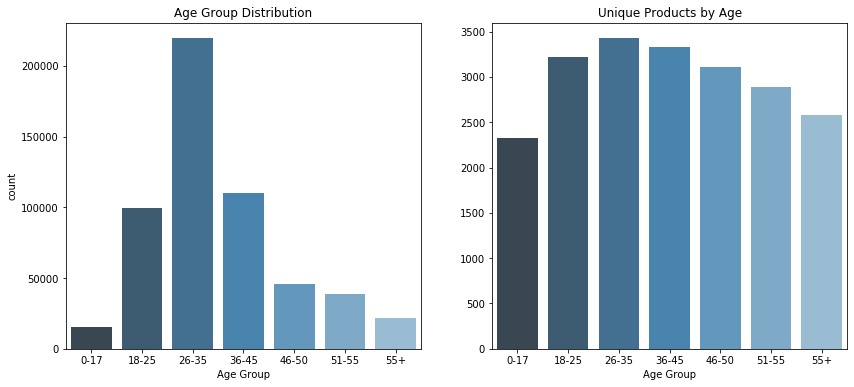

In [0]:
import seaborn as sns
df['Age_Encoded'] = df['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})

prod_byage = df.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(df['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

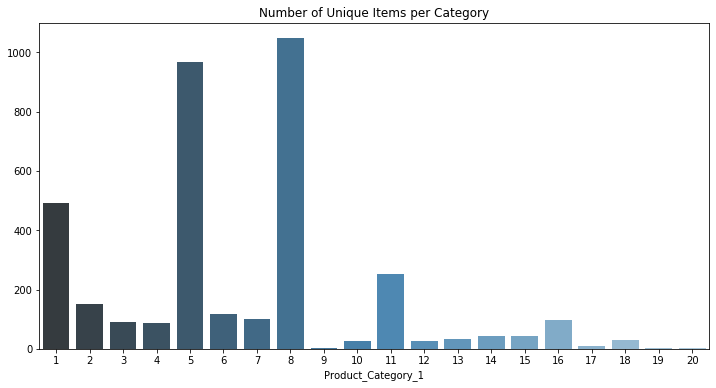

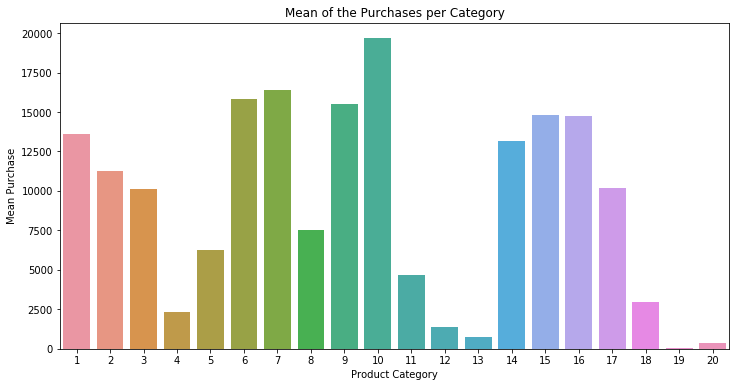

In [0]:
plt.figure(figsize=(12,6))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Blues_d")
plt.title('Number of Unique Items per Category')
plt.show()
category = []
mean_purchase = []



for i in df['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(df[df['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()